In [0]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn import datasets, svm
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
#df = pd.read_csv('wml_data.csv', header = 0)
#df = pd.read_csv('wml_avn_fan_op.csv', header = 0)

C:\Users\Public\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Public\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [0]:
#multivariate linear regression NEW BLOCK 
#80/20 split- 20% training data

#train, test = train_test_split(fifa_dataset, test_size=0.2)  // fifa_dataset here is a panda dataframe



data_avn = pd.read_csv('wml_avn_label.csv', header = 0)

data_fan = pd.read_csv('wml_fan_label.csv', header = 0)

data_avn_fan = pd.read_csv('wml_avn_fan_label.csv', header = 0)

data_avn_fan_op = pd.read_csv('wml_avn_fan_op_label.csv', header = 0)

data_op = pd.read_csv('wml_op_label.csv', header = 0)
#label = pd.read_csv('wml_label.csv', header = 0)





# for avn_fan_op
df2 = data_avn_fan_op  ##############################################################################

train, test = train_test_split(df2, test_size=0.1)

y_train_true = train.iloc[:,[0]]

y_test_true = test.iloc[:,[0]]

#x_train = train.iloc[:,1:22] #- Except OP mean median std----------------------------------------------
x_train = train.iloc[:,1:25]
x_test = test.iloc[:,1: 25]

#print( x_train , y_train_true)



# GRID SEARCH hyperparameter tuning

# GENERAL MODEL fit & Training cell

# accuracy cell 

# K-fold cross validation training & score

data_avn = pd.read_csv('wml_avn_label.csv', header = 0)

data_fan = pd.read_csv('wml_fan_label.csv', header = 0)

data_avn_fan = pd.read_csv('wml_avn_fan_label.csv', header = 0)

data_avn_fan_op = pd.read_csv('wml_avn_fan_op_label.csv', header = 0)

data_op 

# LEAVE ONE OUT USING SVM (named as model) 100%  data ONLY AVN & FAN

In [0]:
'''
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
# Create a classifier object with the classifier and parameter candidates
model = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)
'''
parameter_candidates = [
  {'C': [ 100], 'kernel': ['linear'] }

]
# Create a classifier object with the classifier and parameter candidates
model = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)




from sklearn.model_selection import LeaveOneOut ########LEAVE ONE OUT
import numpy as np
#x = np.array([[1, 2], [3, 4]])
x_train = data_avn_fan.iloc[:,1:17] #----------------
y_train = data_avn_fan.iloc[:,[0]]


x = np.array(x_train)
y = np.array(y_train.values.ravel())

############# Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit_transform(x.values.reshape(-1, 1))
x = scaler.fit_transform(x)
#X_test = scaler.transform(X_test)

loo = LeaveOneOut()
loo.get_n_splits(x)
# x_train mane whole data nea dorkar ekhane
for train_index, test_index in loo.split(x):
        #print("train:", train_index, "validation:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        model.fit(x_train, y_train.ravel())
        y_train_pred =  model.predict(x_train) #--------------------------------------------------
        #print (y_train_true.values.ravel(),y_train_pred)

        #y_test_pred = model.predict(x_test)  
       
#model.fit(x_train, y_train_true.values.ravel()) ###########################################

print('Best C:',model.best_estimator_.C) 
print('Best Kernel:',model.best_estimator_.kernel)
print('Best Gamma:',model.best_estimator_.gamma)

from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

y_train
print("Train Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

results = confusion_matrix(y_train, y_train_pred)
print ('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(y_train, y_train_pred) ) 
print ('Report : ')
#print (classification_report(y_train, y_train_pred) )



# SVM model(GRID search scaler) AVN, FAN_class 2
Best C: 100
Best Kernel: linear
Best Gamma: auto
Train Accuracy: 0.740458015267
Confusion Matrix :
[[31 18]
 [16 66]]
Accuracy Score : 0.740458015267
Report : 
             precision    recall  f1-score   support

          1       0.66      0.63      0.65        49
          2       0.79      0.80      0.80        82

avg / total       0.74      0.74      0.74       131
# SVM model AVN, FAN, OP
Train Accuracy: 0.770992366412
Confusion Matrix :
[[36 13]
 [17 65]]
Accuracy Score : 0.770992366412
Report : 
             precision    recall  f1-score   support

          1       0.68      0.73      0.71        49
          2       0.83      0.79      0.81        82

avg / total       0.78      0.77      0.77       131
# SVM model AVN
Train Accuracy: 0.679389312977
Confusion Matrix :
[[31 18]
 [24 58]]
Accuracy Score : 0.679389312977
Report : 
             precision    recall  f1-score   support

          1       0.56      0.63      0.60        49
          2       0.76      0.71      0.73        82

avg / total       0.69      0.68      0.68       131
# SVM model  FAN
Train Accuracy: 0.63358778626
Confusion Matrix :
[[ 2 47]
 [ 1 81]]
Accuracy Score : 0.63358778626
Report : 
             precision    recall  f1-score   support

          1       0.67      0.04      0.08        49
          2       0.63      0.99      0.77        82

avg / total       0.65      0.63      0.51       131
# SVM model  OP
Train Accuracy: 0.625954198473
Confusion Matrix :
[[ 0 49]
 [ 0 82]]
Accuracy Score : 0.625954198473
Report : 
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        49
          2       0.63      1.00      0.77        82

avg / total       0.39      0.63      0.48       131

# SVM model AVN, FAN, OP 

# ROC CURVe

In [0]:
'''
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
# Create a classifier object with the classifier and parameter candidates
model = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)



from sklearn.model_selection import LeaveOneOut ########LEAVE ONE OUT
import numpy as np

'''
###2.  ROC curves
from sklearn.metrics import precision_recall_curve
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#x = np.array([[1, 2], [3, 4]])
x_train = data_avn_fan_op.iloc[:,1:25] #----------------
y_train = data_avn_fan_op.iloc[:,[0]]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = np.array(x_train)
y = np.array(y_train.values.ravel())

x = scaler.fit_transform(x)

loo = LeaveOneOut()
loo.get_n_splits(x)
# x_train mane whole data nea dorkar ekhane
for train_index, test_index in loo.split(x):
        #print("train:", train_index, "validation:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        model.fit(x_train, y_train.ravel())
        y_train_pred =  model.predict(x_train)  #--------------------------------------------------
        
        #auc = roc_auc_score(y_train, model.decision_function(x_train))
        #fpr, tpr, _ = roc_curve(y_train , model.decision_function(x_train))
        
from sklearn import metrics
y_train_pred =  model.predict(x_train)
print("Train Accuracy:",metrics.accuracy_score(y_train, y_train_pred))


from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_train, y_train_pred)
print ('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(y_train, y_train_pred) ) 
print ('Report : ')
#print (classification_report(y_train, y_train_pred) )

'''
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)
'''
'''
plt.figure()
#for gamma in [1, 0.05, 0.01]:
#svc = SVC(gamma=gamma).fit(X_train, y_train)

#accuracy = svc.score(X_test, y_test)
#auc = roc_auc_score(y_train, model.decision_function(X_test))
#fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
print("  accuracy = %.02f  AUC = %.02f" % ( accuracy, auc))
#plt.plot(fpr, tpr, label="gamma=%.03f" %  linewidth=4)
plt.plot(fpr, tpr, label="gamma=%.03f"  )
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
plt.show()
'''

Train Accuracy: 0.778625954198
Confusion Matrix :
Report : 


'\nplt.figure()\n#for gamma in [1, 0.05, 0.01]:\n#svc = SVC(gamma=gamma).fit(X_train, y_train)\n\n#accuracy = svc.score(X_test, y_test)\n#auc = roc_auc_score(y_train, model.decision_function(X_test))\n#fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))\nprint("  accuracy = %.02f  AUC = %.02f" % ( accuracy, auc))\n#plt.plot(fpr, tpr, label="gamma=%.03f" %  linewidth=4)\nplt.plot(fpr, tpr, label="gamma=%.03f"  )\nplt.xlabel("FPR")\nplt.ylabel("TPR")\nplt.xlim(-0.01, 1)\nplt.ylim(0, 1.02)\nplt.legend(loc="best")\nplt.show()\n'

# SVM & AVN

# SVM_ & FAN  OP combinations 

op_Avn
Train Accuracy: 0.679389312977
Confusion Matrix :
[[27 22]
 [20 62]]
Accuracy Score : 0.679389312977
Report : 
             precision    recall  f1-score   support

          1       0.57      0.55      0.56        49
          2       0.74      0.76      0.75        82

avg / total       0.68      0.68      0.68       131
OP_FAN
Accuracy: 0.664122137405
Confusion Matrix :
[[24 25]
 [19 63]]
Accuracy Score : 0.664122137405
Report : 
             precision    recall  f1-score   support

          1       0.56      0.49      0.52        49
          2       0.72      0.77      0.74        82

avg / total       0.66      0.66      0.66       131

# Random forest ----leave one out & AVN_FAN

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=400)
model = clf

#clf.fit(x_train,y_train_true)
#y_test_pred=clf.predict(x_test)
#x_train = data_avn_fan.iloc[:,1:17]
#x_train = data_avn.iloc[:,1:8] #----------------
#y_train = data_avn.iloc[:,[0]]
import numpy as np
data_avn_op = pd.read_csv('op_avn_label.csv', header = 0)
data_fan_op = pd.read_csv('op_fan_label.csv', header = 0)
x_train = data_avn_fan_op.iloc[:,1:16] #----------------
y_train = data_avn_fan_op.iloc[:,[0]]

x = np.array(x_train)
y = np.array(y_train.values.ravel())
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
'''

loo = LeaveOneOut()
loo.get_n_splits(x)
for train_index, test_index in loo.split(x):
        #print("train:", train_index, "validation:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        model.fit(x_train, y_train.ravel())
        y_train_pred =  model.predict(x_train)  #--------------------------------------------------
        #print (y_train_true.values.ravel(),y_train_pred)

        #y_test_pred = model.predict(x_test)        
#model.fit(x_train, y_train_true.values.ravel()) ###########################################

from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print("Train Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

results = confusion_matrix(y_train, y_train_pred)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_train, y_train_pred) ) 

y_train_pred =  model.predict(x)
print ('Report : ')
#print (classification_report(y_train, y_train_pred) )
print (classification_report(y, y_train_pred) )

Train Accuracy: 0.793893129771
Confusion Matrix :
[[45  4]
 [23 59]]
Accuracy Score : 0.793893129771
Report : 
             precision    recall  f1-score   support

          1       0.65      0.92      0.76        49
          2       0.94      0.71      0.81        83

avg / total       0.83      0.79      0.79       132



# ERROR for REGression

In [0]:



test_data_error = mean_absolute_error(y_test_true, y_test_pred)
accuracy

#define model I am using
model = LinearRegression()
#training process
##model.fit(train[features], train[target])
from sklearn.metrics import f1_score

model.fit(data_avn, target_1col)
#mean absolute value for training data
##data = train[target]
true_target = target_1col
##predict =  model.predict(train[features])
predict =  model.predict(data_avn)


training_error = mean_absolute_error(true_target, predict)
accuracy = r2_score(true_target, predict)
#accuracy = f1_score(true_target, predict, average='micro')
print(predict)
accuracy




from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')
model.fit(train_img, train_lbl)
y_pred = model.predict(test_img)
# how did our model perform?
count_misclassified = (test_lbl != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(test_lbl, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


Logistic Regression for multiclass

# ROC curve try

C:\Users\Public\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\lib\site-packages\ipykernel\__main__.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Public\lib\site-packages\ipykernel\__main__.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Public\lib\site-packages\ip

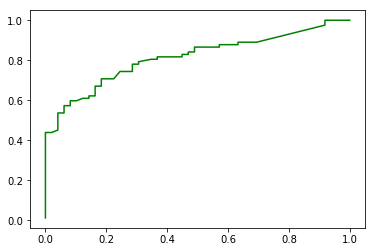

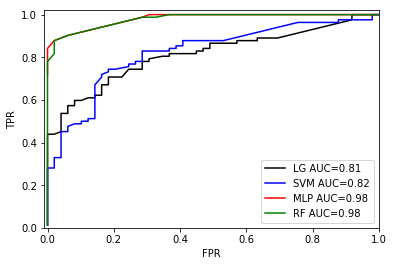

In [0]:
from sklearn.model_selection import LeaveOneOut ########LEAVE ONE OUT
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

model = LogisticRegression(solver = 'lbfgs')

parameter_candidates = [
  {'C': [ 100], 'kernel': ['linear'] }

]

svm = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100,100,100))


import numpy as np

x_train = data_avn_fan_op.iloc[:,1:25] #----------------
y_train = data_avn_fan_op.iloc[:,[0]]

# binarizing

y_train_bin = label_binarize(y_train, classes=[1,2])
#n_classes = y_train_bin.shape[1]

model2 = model #Logis regression
y2 = np.array(y_train_bin)

x = np.array(x_train)
y = np.array(y_train.values.ravel())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

loo = LeaveOneOut()
loo.get_n_splits(x)
'''

'''
for train_index, test_index in loo.split(x):
        #print("train:", train_index, "validation:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        #y_train, y_test = y[train_index], y[test_index]
        
        y_train_bin, y_test_bin = y2[train_index], y2[test_index]
        
        #model.fit(x_train, y_train.ravel())
        
        
        #y_train_pred =  model.predict(x_train)  #--------------------------------------------------
        #print (y_train_true.values.ravel(),y_train_pred)
        #y_score = classifier.fit(x_train, y_train).decision_function(x_train)
        
        mod = model2.fit(x_train, y_train_bin)##############3 logis regression
        auc_l = roc_auc_score(y_train_bin, mod.predict_proba(x_train)[:,1])
        fpr_l, tpr_l, _ = roc_curve(y_train_bin , mod.predict_proba(x_train)[:,1])
        
        #y_test_pred = model.predict(x_test)        
#model.fit(x_train, y_train_true.values.ravel()) ###########################################
'''
for train_index, test_index in loo.split(x):
        #print("train:", train_index, "validation:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        
        y_train_bin, y_test_bin = y2[train_index], y2[test_index]
        
        
        svc = svm.fit(x_train, y_train_bin)##############3
        auc_svc = roc_auc_score(y_train_bin, svc.decision_function(x_train))
        fpr_s, tpr_s, _ = roc_curve(y_train_bin , svc.decision_function(x_train))
''' 
for train_index, test_index in loo.split(x):
        #print("train:", train_index, "validation:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        
        y_train_bin, y_test_bin = y2[train_index], y2[test_index]
        
        
        s = svm.fit(x_train, y_train_bin.ravel())##############3
        auc_s = roc_auc_score(y_train_bin.ravel(), s.decision_function(x_train))
        fpr_s, tpr_s, _ = roc_curve(y_train_bin.ravel() , s.decision_function(x_train))
       
for train_index, test_index in loo.split(x):
        #print("train:", train_index, "validation:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        
        y_train_bin, y_test_bin = y2[train_index], y2[test_index]
        
        
        mlc = mlp.fit(x_train, y_train_bin)##############3
        auc_m = roc_auc_score(y_train_bin, mlc.predict_proba(x_train)[:,1])
        fpr_m, tpr_m, _ = roc_curve(y_train_bin , mlc.predict_proba(x_train)[:,1])
        
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut ########LEAVE ONE OUT
rf=RandomForestClassifier(n_estimators=400)
#model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100,100,100))

for train_index, test_index in loo.split(x):
        #print("train:", train_index, "validation:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        
        y_train_bin, y_test_bin = y2[train_index], y2[test_index]
        
        
        r = rf.fit(x_train, y_train_bin)##############3
        auc_r = roc_auc_score(y_train_bin, rf.predict_proba(x_train)[:,1])
        fpr_r, tpr_r, _ = roc_curve(y_train_bin , rf.predict_proba(x_train)[:,1])


plt.figure()

plt.plot(fpr_l, tpr_l,'k', label="LG AUC=%.02f" % auc_l  )
plt.plot(fpr_s, tpr_s,'b', label="SVM AUC=%.02f" % auc_s  )
plt.plot(fpr_m, tpr_m,'r' ,label="MLP AUC=%.02f" % auc_m  )
plt.plot(fpr_r, tpr_r,'g', label="RF AUC=%.02f" % auc_r  )
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")
plt.show()

In [0]:
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut ########LEAVE ONE OUT
rf=RandomForestClassifier(n_estimators=400)
#model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100,100,100))

for train_index, test_index in loo.split(x):
        #print("train:", train_index, "validation:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        
        y_train_bin, y_test_bin = y2[train_index], y2[test_index]
        
        
        r = rf.fit(x_train, y_train_bin)##############3
        auc_r = roc_auc_score(y_train_bin, rf.predict_proba(x_train)[:,1])
        fpr_r, tpr_r, _ = roc_curve(y_train_bin , rf.predict_proba(x_train)[:,1])

plt.plot(fpr_r, tpr_r,'g', label=auc_r  )
plt.show()

probs = model.predict_proba(testX)


C:\Users\Public\lib\site-packages\ipykernel\__main__.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

Train Accuracy: 0.664122137405
Confusion Matrix :
[[26 23]
 [21 61]]
Accuracy Score : 0.664122137405
Report : 
             precision    recall  f1-score   support

          1       0.55      0.53      0.54        49
          2       0.73      0.74      0.73        82

avg / total       0.66      0.66      0.66       131

#avn_Op
Train Accuracy: 0.656488549618
Confusion Matrix :
[[19 30]
 [15 67]]
Accuracy Score : 0.656488549618
Report : 
             precision    recall  f1-score   support

          1       0.56      0.39      0.46        49
          2       0.69      0.82      0.75        82

avg / total       0.64      0.66      0.64       131

# logistic Regression
# avn,fan,op
Train Accuracy: 0.717557251908
Confusion Matrix :
[[26 23]
 [14 68]]
Accuracy Score : 0.717557251908
Report : 
             precision    recall  f1-score   support

          1       0.65      0.53      0.58        49
          2       0.75      0.83      0.79        82

avg / total       0.71      0.72      0.71       131
# avn_fan
Train Accuracy: 0.748091603053
Confusion Matrix :
[[29 20]
 [13 69]]
Accuracy Score : 0.748091603053
Report : 
             precision    recall  f1-score   support

          1       0.69      0.59      0.64        49
          2       0.78      0.84      0.81        82

avg / total       0.74      0.75      0.74       131
# avn
Train Accuracy: 0.664122137405
Confusion Matrix :
[[27 22]
 [22 60]]
Accuracy Score : 0.664122137405
Report : 
             precision    recall  f1-score   support

          1       0.55      0.55      0.55        49
          2       0.73      0.73      0.73        82

avg / total       0.66      0.66      0.66       131
# fan
Train Accuracy: 0.641221374046
Confusion Matrix :
[[ 4 45]
 [ 2 80]]
Accuracy Score : 0.641221374046
Report : 
             precision    recall  f1-score   support

          1       0.67      0.08      0.15        49
          2       0.64      0.98      0.77        82

avg / total       0.65      0.64      0.54       131
# op
Accuracy: 0.641221374046
Confusion Matrix :
[[ 2 47]
 [ 0 82]]
Accuracy Score : 0.641221374046
Report : 
             precision    recall  f1-score   support

          1       1.00      0.04      0.08        49
          2       0.64      1.00      0.78        82

avg / total       0.77      0.64      0.52       131

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut ########LEAVE ONE OUT
import numpy as np
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
model = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
'''
print('Best C:',model.best_estimator_.C) 
print('Best Kernel:',model.best_estimator_.kernel)
print('Best Gamma:',model.best_estimator_.gamma)
'''

# M L P neural network

In [0]:
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import LeaveOneOut ########LEAVE ONE OUT

model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100,100,100))
 ##For small datasets, however, ‘lbfgs’ can converge faster and perform better.

x_train = data_avn_fan_op.iloc[:,1:25] #----------------
y_train = data_avn_fan_op.iloc[:,[0]]


x = np.array(x_train)
y = np.array(y_train.values.ravel())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

loo = LeaveOneOut()
loo.get_n_splits(x)
for train_index, test_index in loo.split(x):
        #print("train:", train_index, "validation:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        model.fit(x_train, y_train.ravel())
        y_train_pred =  model.predict(x_train)  #--------------------------------------------------
        #print (y_train_true.values.ravel(),y_train_pred)

        #y_test_pred = model.predict(x_test)        
#model.fit(x_train, y_train_true.values.ravel()) ###########################################


from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

print("Train Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

results = confusion_matrix(y_train, y_train_pred)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_train, y_train_pred) ) 
print ('Report : ')
print (classification_report(y_train, y_train_pred) )

Train Accuracy: 0.916030534351
Confusion Matrix :
[[48  1]
 [10 72]]
Accuracy Score : 0.916030534351
Report : 
             precision    recall  f1-score   support

          1       0.83      0.98      0.90        49
          2       0.99      0.88      0.93        82

avg / total       0.93      0.92      0.92       131



# MLP solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100,100,100)
# avn fan op
Accuracy: 0.916030534351
Confusion Matrix :
[[48  1]
 [10 72]]
Accuracy Score : 0.916030534351
Report : 
             precision    recall  f1-score   support

          1       0.83      0.98      0.90        49
          2       0.99      0.88      0.93        82

avg / total       0.93      0.92      0.92       131
# fan op
Confusion Matrix :
[[44  5]
 [22 60]]
Accuracy Score : 0.793893129771
Report : 
             precision    recall  f1-score   support

          1       0.67      0.90      0.77        49
          2       0.92      0.73      0.82        82

avg / total       0.83      0.79      0.80       131
# avn op
Confusion Matrix :
[[39 10]
 [ 9 73]]
Accuracy Score : 0.854961832061
Report : 
             precision    recall  f1-score   support

          1       0.81      0.80      0.80        49
          2       0.88      0.89      0.88        82

avg / total       0.85      0.85      0.85       131
 
 # avn fan
Confusion Matrix :
[[46  3]
 [12 70]]
Accuracy Score : 0.885496183206
Report : 
             precision    recall  f1-score   support

          1       0.79      0.94      0.86        49
          2       0.96      0.85      0.90        82

avg / total       0.90      0.89      0.89       131 
# avn
Confusion Matrix :
[[39 10]
 [26 56]]
Accuracy Score : 0.725190839695
Report : 
             precision    recall  f1-score   support

          1       0.60      0.80      0.68        49
          2       0.85      0.68      0.76        82

avg / total       0.76      0.73      0.73       131
# fan
Confusion Matrix :
[[43  6]
 [25 57]]
Accuracy Score : 0.763358778626
Report : 
             precision    recall  f1-score   support

          1       0.63      0.88      0.74        49
          2       0.90      0.70      0.79        82

avg / total       0.80      0.76      0.77       131
# op
Confusion Matrix :
[[19 30]
 [ 2 80]]
Accuracy Score : 0.75572519084
Report : 
             precision    recall  f1-score   support

          1       0.90      0.39      0.54        49
          2       0.73      0.98      0.83        82

avg / total       0.79      0.76      0.72       131


In [0]:
#x_train = data_op.iloc[:,1:8] #----------------
#y_train = data_op.iloc[:,[0]]
import numpy as np
data_avn_op = pd.read_csv('op_avn_label.csv', header = 0)
data_fan_op = pd.read_csv('op_fan_label.csv', header = 0)
x_train = data_op.iloc[:,1:8] #----------------
y_train = data_op.iloc[:,[0]]
model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100,100,100))
'''
data_avn = 1:8

data_fan 1:8

data_avn_fan  1:17

data_avn_fan_op = 1:25

data_op 1:8
'''

'\ndata_avn = 1:8\n\ndata_fan 1:8\n\ndata_avn_fan  1:17\n\ndata_avn_fan_op = 1:25\n\ndata_op 1:8\n'

In [0]:
x = np.array(x_train)
y = np.array(y_train.values.ravel())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

loo = LeaveOneOut()
loo.get_n_splits(x)
# x_train mane whole data nea dorkar ekhane
for train_index, test_index in loo.split(x):
        #print("train:", train_index, "validation:", test_index)
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        model.fit(x_train, y_train.ravel())
        y_train_pred =  model.predict(x_train)  #--------------------------------------------------
        
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_train, y_train_pred)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_train, y_train_pred) ) 
print ('Report : ')
y_train_pred =  model.predict(x_train)
print (classification_report(y_train, y_train_pred) )

Confusion Matrix :
[[19 30]
 [ 2 80]]
Accuracy Score : 0.75572519084
Report : 
             precision    recall  f1-score   support

          1       0.90      0.39      0.54        49
          2       0.73      0.98      0.83        82

avg / total       0.79      0.76      0.72       131



In [0]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt    
    
    plt.style.use('ggplot')

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
    
    # load the wine datasets
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # fit a XGBoost model to the data
model = XGBClassifier()
model.fit(X_train, y_train)
print(); print(model)
    
    # make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)

    # summarize the fit of the model
print(); print('XGBoost: ')
print(); print(metrics.classification_report(expected_y, predicted_y, 
                   target_names=dataset.target_names))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))

    # fit a CatBoost model to the data
model = CatBoostClassifier()
model.fit(X_train, y_train)
    print(); print(model)

    # make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)

    # summarize the fit of the model
print(); print('CatBoost: ')
print(); print(metrics.classification_report(expected_y, predicted_y, 
                   target_names=dataset.target_names))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))
    
    # fit a LightGBM model to the data
model = LGBMClassifier()
model.fit(X_train, y_train)
print(); print(model)

    # make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)
    
    # summarize the fit of the model
print(); print('LightGBM: ')
print(); print(metrics.classification_report(expected_y, predicted_y, 
                   target_names=dataset.target_names))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))